<a href="https://colab.research.google.com/github/Leoberta/Programming/blob/main/ParticleInBoxNumerov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
Needed for working with widgets on google colab

In [ ]:
!pip install -q ipympl
get_ipython().kernel.do_shutdown(restart=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00


{'status': 'ok', 'restart': True}

Enabling the use of third party widgets on the colab

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Real normal imports

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import rc

%matplotlib widget

# Numerov algorithm
## Variables

In [ ]:
L = 1
Npoints = 100
Estep = 0.1
accuracy = 0.0001
Nlevels = 1

## Helper functions

In [ ]:
# phi function
def phi(psi, k, E, dx):
	return psi[k] * (1 + dx*dx*E/6)

# Integrate wavefunciton
def integrate(psi, dx):
  res = 0.0
  for i in range(1, len(psi)):
    res += (psi[i-1] + psi[i]) * dx / 2
  return res

# Generate wavefunction
def numerov(E, dx):
	# Apply the formula
	psi = [0, 1]
	for k in range(2, Npoints):
		psi.append(0)
		psi[k] = (2*phi(psi, k-1, E, dx) - phi(psi, k-2, E, dx) - 2*dx*dx*E*psi[k-1]) / (1 + dx*dx*E/6)

	# Normalize the resulting wavefunction
	norm = np.sqrt(integrate([y*y for y in psi], dx))
	return np.array(psi) / norm

# Bisection algorithm, find the zero of f(x) between x10 and x20
def bisect(f, x10, x20):
	x1 = x10
	f1 = f(x10)
	x2 = x20
	midf = accuracy + 1
	while (abs(midf) > accuracy):
		midf = f((x1+x2)/2)
		if f1*midf > 0:
			x1 = (x1+x2) / 2
		else:
			x2 = (x1+x2) / 2
	return (x1+x2) / 2

## Main function

In [ ]:
# Compute the method for each level and plot the results
def compute(ax1, ax2):
	print('Computing {} levels for Npoints = {}...'.format(Nlevels, Npoints))
	xs = np.linspace(-L, L, Npoints)
	dx = 2*L / Npoints
	E0 = Estep
	for i in range(0, Nlevels):
		# Find the bracketing energy values: eigenvalue E is in [E1, E2]
		E2 = E0
		prevBoundary = numerov(E2, dx)[-1]
		boundary = prevBoundary
		while (prevBoundary*boundary > 0):
			prevBoundary = boundary
			E2 += Estep
			boundary = numerov(E2, dx)[-1]
		E1 = E2 - Estep

		# Bisect between E1 and E2
		E = bisect(lambda x: numerov(x, dx)[-1], E1, E2)
		print('E{} = {}'.format(i, E))
		E0 = E + Estep

		# Apply algorithm for the next eigenfunction and calculate modulus squared
		psi = numerov(E, dx)
		psi2 = np.power(psi, 2)

		# Plot the results, shifting psi^2 for readability
		ax1.plot(xs, psi2 + i)
		ax2.plot([E]*2)

## Compute and Plot

Computing 1 levels for Npoints = 100...
E0 = 1.25869140625


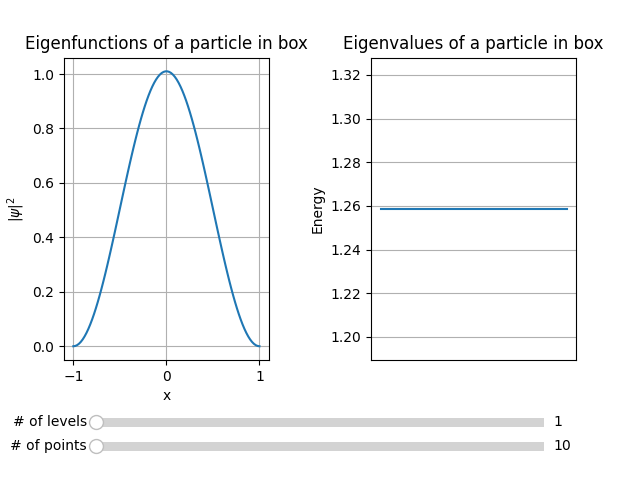

Computing 2 levels for Npoints = 10...
E0 = 1.5228515625000003
E1 = 6.086523437499995
Computing 2 levels for Npoints = 210...
E0 = 1.24560546875
E1 = 4.982226562499999
Computing 2 levels for Npoints = 410...
E0 = 1.239697265625
E1 = 4.959033203124999
Computing 2 levels for Npoints = 610...
E0 = 1.23779296875
E1 = 4.95068359375
Computing 2 levels for Npoints = 810...
E0 = 1.2371093750000002
E1 = 4.9470703125
Computing 2 levels for Npoints = 610...
E0 = 1.23779296875
E1 = 4.95068359375
Computing 2 levels for Npoints = 410...
E0 = 1.239697265625
E1 = 4.959033203124999
Computing 2 levels for Npoints = 210...
E0 = 1.24560546875
E1 = 4.982226562499999
Computing 3 levels for Npoints = 210...
E0 = 1.24560546875
E1 = 4.982226562499999
E2 = 11.209765624999978
Computing 4 levels for Npoints = 210...
E0 = 1.24560546875
E1 = 4.982226562499999
E2 = 11.209765624999978
E3 = 19.931640625000018
Computing 5 levels for Npoints = 210...
E0 = 1.24560546875
E1 = 4.982226562499999
E2 = 11.209765624999978
E3 =

In [ ]:
# Setup the two plots: wavefunction and energy
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(left=0.1, bottom=0.25, wspace=0.5)
ax1.set(xlabel='x', ylabel=r"$|\psi|^2$", title='Eigenfunctions of a particle in box')
ax1.grid()
ax2.set(ylabel='Energy', title='Eigenvalues of a particle in box')
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.grid(axis='y')

# Setup the widgets to control some parameters (slow and inefficient but cool)
axNp = plt.axes([0.15, 0.05, 0.7, 0.04])
axNl = plt.axes([0.15, 0.1, 0.7, 0.04])
sliderNl = Slider(axNl, '# of levels', 1, 10, valinit=Nlevels, valstep=1)
sliderNp = Slider(axNp, '# of points', 10, 1000, valinit=Npoints, valstep=200)
def update(_):
	global Nlevels
	global Npoints
	Nlevels = sliderNl.val
	Npoints = sliderNp.val
	ax1.clear()
	ax2.clear()
	compute(ax1, ax2)
	fig.canvas.draw()
	ax1.set(xlabel='x', ylabel=r"$|\psi|^2$", title='Eigenfunctions of a particle in box')
	ax1.grid()
	ax2.set(ylabel='Energy', title='Eigenvalues of a particle in box')
	ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
	ax2.grid(axis='y')
sliderNl.on_changed(update)
sliderNp.on_changed(update)

# Real computation
compute(ax1, ax2)

# Show the results
# fig.tight_layout()
plt.show()